<a href="https://colab.research.google.com/github/jonbaer/googlecolab/blob/master/EfficientNet_PyTorch_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Download image and class labels
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/img.jpg
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt

In [0]:
# Get EfficientNet PyTorch
!pip install efficientnet_pytorch

In [0]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [0]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

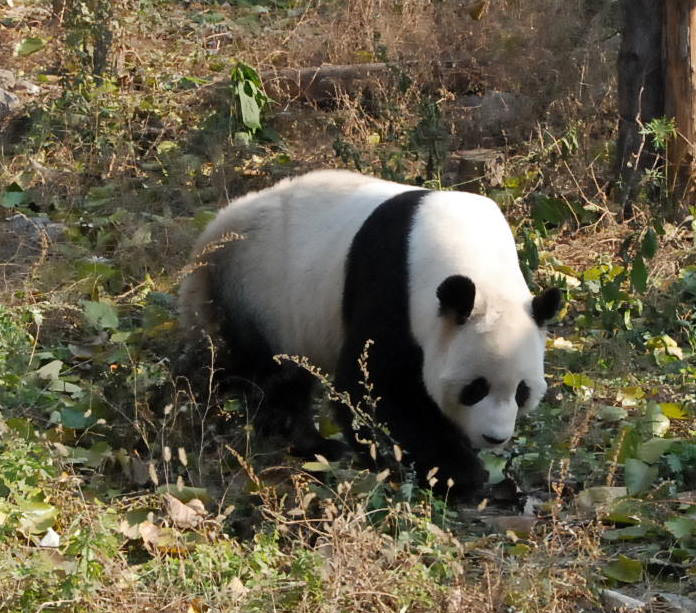

In [0]:
img = Image.open('img.jpg')
img

In [0]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [0]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [0]:
# Classify with EfficientNet
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Downloading: "http://storage.googleapis.com/public-models/efficientnet-b0-08094119.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-08094119.pth
100%|██████████| 21383481/21383481 [00:00<00:00, 62443002.27it/s]


Loaded pretrained weights for efficientnet-b0
-----
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (90.04%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.62%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.19%)
soccer ball                                                                 (0.14%)
badger                                                                      (0.10%)
